# Волатильность пары EURUSD по годам 2004 - 2021

Посмотрим на волатильность пары EURUSD, по годам, за период 2004 - 2021(по ноябрь).
Используем дневные графики, волатильность считаем как стандартное отклонение. Собственно, нам не столько нужно значение волатильности, сколько отношение значения волатильности в 2021 году к волатильности в 2004 году.
Ну и другие года интересно посмотреть.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from pylab import mpl, plt

Закачаем данные по евро с 2004 года. Данные берем с Deriv, из других источников (Investing.com) получается то же самое.

In [54]:
datafile = '/home/sash/Python/projects/mlfin/data/EURUSD_Daily_200401010000_202111040000.csv'
df = pd.read_csv(datafile,
                 encoding='utf-8',
                 index_col=0,
                 skiprows=1,
                 header= None,
                 parse_dates=True,
                 names= ['date', 'open','high', 'low', 'close', 'tv', 'vol', 'spread'],
                 sep='\t')
df.drop(['tv', 'vol', 'spread'], axis= 1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5562 entries, 2004-01-01 to 2021-11-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5562 non-null   float64
 1   high    5562 non-null   float64
 2   low     5562 non-null   float64
 3   close   5562 non-null   float64
dtypes: float64(4)
memory usage: 217.3 KB


Вычислим волатильность пары в разбивке по годам.

In [56]:
year_returns = df.groupby([df.index.year.rename('year')]).std()

In [58]:
year_returns

,open,high,low,close
year,,,,
2004,0.042290,0.042528,0.042523,0.042764
2005,0.050865,0.050783,0.050677,0.050531
2006,0.038102,0.038090,0.038053,0.038025
2007,0.053193,0.053796,0.052690,0.053366
2008,0.103354,0.100767,0.105140,0.103555
2009,0.072613,0.070820,0.073308,0.072494
2010,0.060092,0.059564,0.060035,0.059786
2011,0.046413,0.046370,0.046006,0.046590
2012,0.032745,0.032566,0.032808,0.032808


Рассчитаем, во сколько раз волатильность в 2021 году меньше, чем в 2004

In [64]:
difference = year_returns['close'][2004] / year_returns['close'][2021]
print(difference)

2.165208930066993


Ну и посмотрим на графике, как менялась волатильность по годам

<AxesSubplot:xlabel='year'>

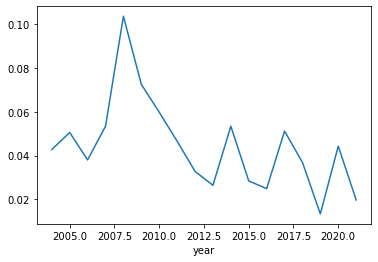

In [53]:
year_returns['close'].plot()

In [ ]:
y